In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [26]:
# Importing the dataset

sleepData = pd.read_csv("../data/SaYoPillow.csv")
sleepData.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,91.840,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,91.552,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,96.000,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,90.768,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,97.872,6.496,96.248,72.48,8.248,53.12,0


In [3]:
# Converting the body temperature from farenheit to celsius

def convert_to_celsius(x):
    return (x - 32) * 5/9

sleepData["t"] = sleepData["t"].apply(convert_to_celsius)
sleepData.head()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
0,93.80,25.680,33.244444,16.600,89.840,99.60,1.840,74.20,3
1,91.64,25.104,33.084444,15.880,89.552,98.88,1.552,72.76,3
2,60.00,20.000,35.555556,10.000,95.000,85.00,7.000,60.00,1
3,85.76,23.536,32.648889,13.920,88.768,96.92,0.768,68.84,3
4,48.12,17.248,36.595556,6.496,96.248,72.48,8.248,53.12,0


In [4]:
sleepData.corr()

,sr,rr,t,lm,bo,rem,sr.1,hr,sl
sr,1.000000,0.976268,-0.902475,0.981078,-0.903140,0.950600,-0.920554,0.976268,0.975322
rr,0.976268,1.000000,-0.889237,0.991738,-0.889210,0.935572,-0.891855,1.000000,0.963516
t,-0.902475,-0.889237,1.000000,-0.896412,0.998108,-0.857299,0.954860,-0.889237,-0.962354
lm,0.981078,0.991738,-0.896412,1.000000,-0.898527,0.964703,-0.901102,0.991738,0.971071
bo,-0.903140,-0.889210,0.998108,-0.898527,1.000000,-0.862136,0.950189,-0.889210,-0.961092
rem,0.950600,0.935572,-0.857299,0.964703,-0.862136,1.000000,-0.893952,0.935572,0.951988
sr.1,-0.920554,-0.891855,0.954860,-0.901102,0.950189,-0.893952,1.000000,-0.891855,-0.973036
hr,0.976268,1.000000,-0.889237,0.991738,-0.889210,0.935572,-0.891855,1.000000,0.963516
sl,0.975322,0.963516,-0.962354,0.971071,-0.961092,0.951988,-0.973036,0.963516,1.000000


In [5]:
# Split the Dataset into Train and Test
train, test = train_test_split(sleepData, test_size = 0.25)
X_train = pd.DataFrame(train[["sr", "rr", "t", "lm", "bo", "rem", "sr.1", "hr"]])
y_train = pd.DataFrame(train["sl"])
X_test = pd.DataFrame(test[["sr", "rr", "t", "lm", "bo", "rem", "sr.1", "hr"]])
y_test = pd.DataFrame(test["sl"])

In [6]:
# Check the sample sizes
print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

Train Set : (472, 1) (472, 8)
Test Set  : (158, 1) (158, 8)
Intercept of Regression 	: b =  [2.30958516]
Coefficients of Regression 	: a =  [[ 0.00967718  0.01734862 -0.29588161 -0.07744968  0.04731092  0.03202785
  -0.11154598  0.04337155]]



,Predictors,Coefficients
0,sr,0.009677
1,rr,0.017349
2,t,-0.295882
3,lm,-0.077450
4,bo,0.047311
5,rem,0.032028
6,sr.1,-0.111546
7,hr,0.043372


In [7]:
# Predict the Total values from Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Import mean_squared_error from sklearn
from sklearn.metrics import mean_squared_error

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9999022746033509
Mean Squared Error (MSE) 	: 0.00020249033458225187

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9998507528767768
Mean Squared Error (MSE) 	: 0.00026637777689202113



In [8]:
predictingFactors = ["sr", "rr", "lm", "rem", "sl"]

for i in predictingFactors:
    print("-----Predicting for {}-----".format(i))
    # Predicting snoring rate (sr) with body temp (t), sleep hours (sr), blood oxygen (bo), heart rate (hr)
    y = pd.DataFrame(sleepData[i])
    X = pd.DataFrame(sleepData[["sr.1", "t", "bo", "hr"]])

    # Split the Dataset into Train and Test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

    # Check the sample sizes
    print("Train Set :", y_train.shape, X_train.shape)
    print("Test Set  :", y_test.shape, X_test.shape)

    # Linear Regression using Train Data
    linreg = LinearRegression()         # create the linear regression object
    linreg.fit(X_train, y_train)        # train the linear regression model

    # Coefficients of the Linear Regression line
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    print()

    # Print the Coefficients against Predictors
    pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"])

    # Predict the Total values from Predictors
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    # Import mean_squared_error from sklearn
    from sklearn.metrics import mean_squared_error

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()

-----Predicting for sr-----
Train Set : (472, 1) (472, 4)
Test Set  : (158, 1) (158, 4)
Intercept of Regression 	: b =  [23.3030901]
Coefficients of Regression 	: a =  [[-2.09950105  5.94655566 -2.62454659  1.45412244]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.9683562570115324
Mean Squared Error (MSE) 	: 12.145537053643373

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.9605306188757866
Mean Squared Error (MSE) 	: 13.715325180406005

-----Predicting for rr-----
Train Set : (472, 1) (472, 4)
Test Set  : (158, 1) (158, 4)
Intercept of Regression 	: b =  [-4.]
Coefficients of Regression 	: a =  [[ 1.31927719e-16  2.22044605e-16 -6.66133815e-16  4.00000000e-01]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 1.219391772138242e-29

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 1.0
Mean Squared Error (MSE) 	: 1.3101082375316044e-29

-----Predicting for lm-----
Train 

In [9]:
sleepData[['sl', 'sr.1']].groupby(['sl'], as_index=False).mean().sort_values(by='sr.1', ascending=False)

,sl,sr.1
0,0,8.0
1,1,6.0
2,2,3.5
3,3,1.0
4,4,0.0


In [10]:
sleepData[['sl', 't']].groupby(['sl'], as_index=False).mean().sort_values(by='t', ascending=False)

,sl,t
0,0,36.388889
1,1,35.000000
2,2,33.888889
3,3,32.777778
4,4,30.833333


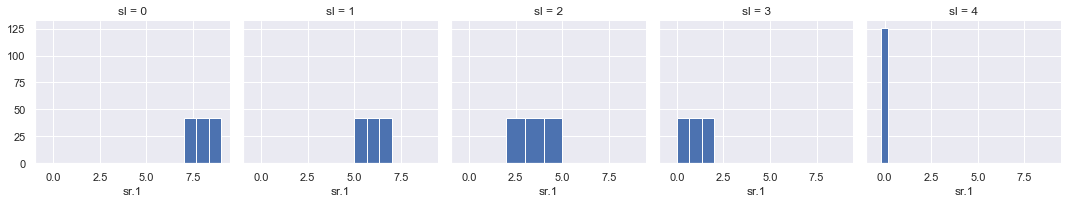

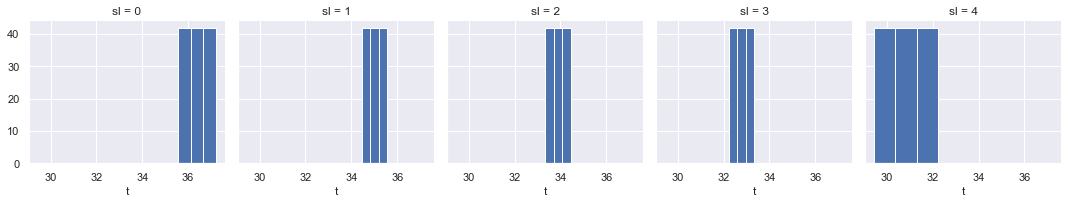

In [11]:
# Plotting the graph of sleep hours vs stress level

g = sns.FacetGrid(sleepData, col='sl')
g.map(plt.hist, 'sr.1', bins=3)

# Plotting the graph of body temperature vs stress level

g = sns.FacetGrid(sleepData, col='sl')
g.map(plt.hist, 't', bins=3)

In [12]:
# Getting to know the info of sleepData
sleepData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630 entries, 0 to 629
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sr      630 non-null    float64
 1   rr      630 non-null    float64
 2   t       630 non-null    float64
 3   lm      630 non-null    float64
 4   bo      630 non-null    float64
 5   rem     630 non-null    float64
 6   sr.1    630 non-null    float64
 7   hr      630 non-null    float64
 8   sl      630 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 44.4 KB


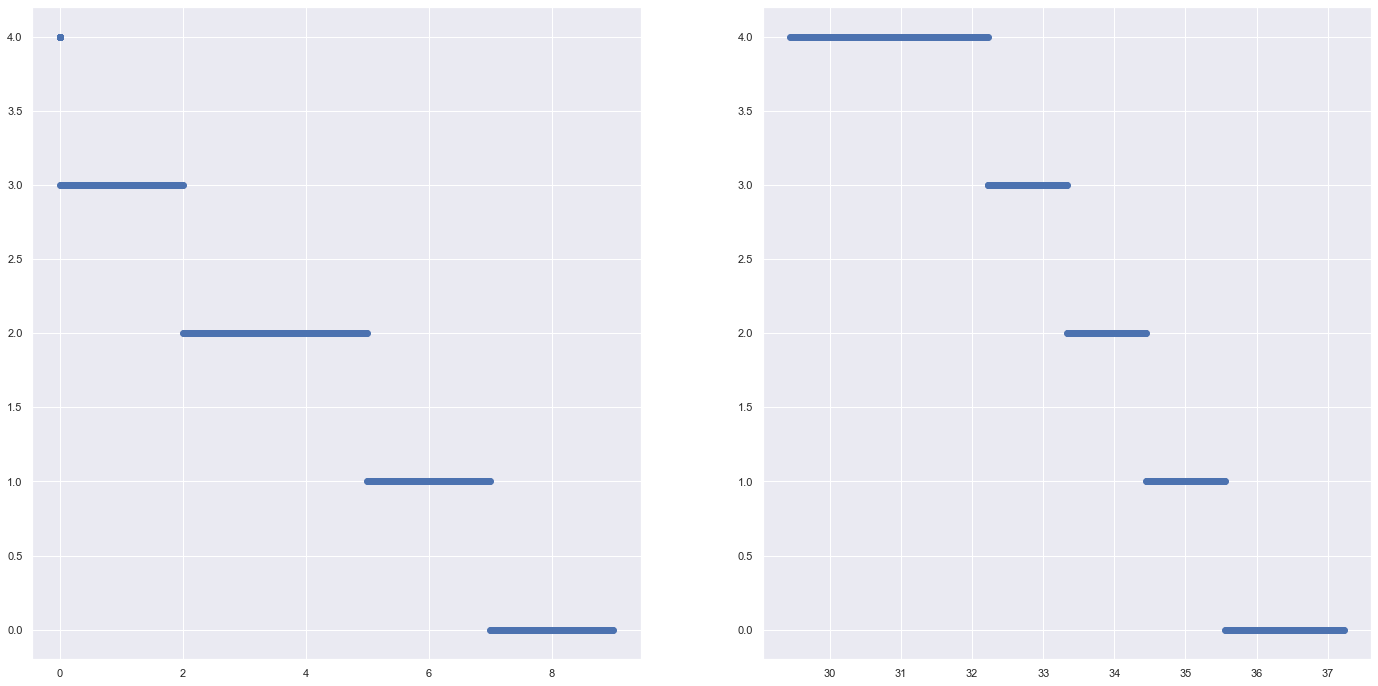

In [13]:
# Trying to see the scatterplot first for "sl" and "sr.1", then followed by "sl" and "t"
sl_sleepData = pd.DataFrame(sleepData["sl"])
sleephrs_sleepData = pd.DataFrame(sleepData["sr.1"])
t_sleepData = pd.DataFrame(sleepData["t"])

f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(sleephrs_sleepData, sl_sleepData)
axes[1].scatter(t_sleepData, sl_sleepData)

### Trying for clusters

https://www.freecodecamp.org/news/how-to-build-and-train-k-nearest-neighbors-ml-models-in-python/

- Since K means clustering algorithm is an unsupervised machine learning algorithm, we do not have to split the data set into training data and test data
- Taking reference from: https://github.com/artikwh/K-Means-Clustering-Arti-Kushwaha/blob/main/K_Means_Clusteing_Arti_Kushwaha.ipynb

# "Sleeping hours"
### Getting the optimum number of clusters for "Sleeping hours"

[5868.828000000001, 1085.8992663866356, 486.72100696802664, 259.89231441727213, 162.39695130974428, 105.92924904635416, 78.09751836182419, 59.58865735188657, 45.89897456108964, 36.658767850030344, 30.135890157657563, 25.53024212773706, 21.380725924799705, 18.400841107515156, 15.823479483952045, 14.0874858261616, 12.454440410324956, 11.069419485599312, 9.810365064205925, 8.954019366215748]


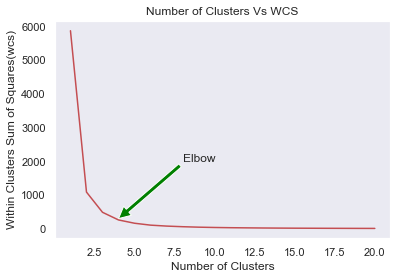

In [14]:
x = sleephrs_sleepData.iloc[:, :].values
wcs = []  #wcs stands for 'within cluster sum of squares'

for i in range(1, 21):
    model = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 250, n_init = 15, random_state = 0)
    model.fit(x)
    wcs.append(model.inertia_)

print(wcs)

plt.plot(range(1, 21), wcs, color = 'r')
plt.title('Number of Clusters Vs WCS')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Clusters Sum of Squares(wcs)')
plt.annotate('Elbow', xytext=(8, 2000), xy=(4,300), arrowprops={'facecolor':'green'})
plt.grid() 
plt.show()

### Elbow occurs where the line graph bends and wcs(within cluster sum of squares ) does not decrease significantly with every iteration. From the above graph, Elbow occurs at number of clusters equivalent to 4.
### So optimum number of clusters for this dataset = 4
### Since the optimum number of clusters is not what we wanted, which is 5, we can see that clustering for all the "Sleeping Hours" may not help to identify the pattern or to predict the "stress levels"

In [15]:
# Getting the data for "sl" and "sr.1"
sleephrs_sleepData = pd.DataFrame(sleepData[["sr.1", "sl"]])

#Initialize the class object
kmeans = KMeans(n_clusters= 5)
kmeans.fit(sleephrs_sleepData)
kmeans.cluster_centers_

array([[3.692     , 2.        ],
       [0.04190968, 3.81290323],
       [8.        , 0.        ],
       [6.        , 1.        ],
       [1.36623009, 2.85840708]])

In [16]:
sleephrs_sleepData["Clusters"] = kmeans.labels_
sleephrs_sleepData.head()

,sr.1,sl,Clusters
0,1.840,3,4
1,1.552,3,4
2,7.000,1,3
3,0.768,3,4
4,8.248,0,2


<AxesSubplot:xlabel='sr.1', ylabel='sl'>

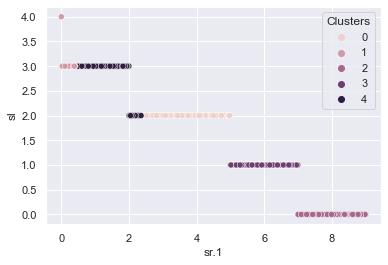

In [17]:
sns.scatterplot(x="sr.1", y="sl", hue="Clusters", data=sleephrs_sleepData)

### From the graph above, we can see that for the cluster at the second layer and third layer from the top, the points are not exactly what we wanted the clusters to be, thus it means that the clustering method for "sleep hours" may not be as good to predict the "stress level"

# "Body temperature"
### Getting the optimum number of clusters for "Body temperature"

[4985.552910052911, 2244.7026455026457, 1345.1549759052732, 538.4469981869981, 145.6692204092204, 105.70255374255375, 82.66814814814816, 60.44734814814824, 50.5714370370371, 40.69552592592598, 30.819614814814848, 23.41739259259263, 19.299525925926055, 16.73134814814828, 14.893674074074191, 13.05853333333342, 11.247822222222279, 9.835111111111097, 8.59976296296295, 7.9559703703703475]


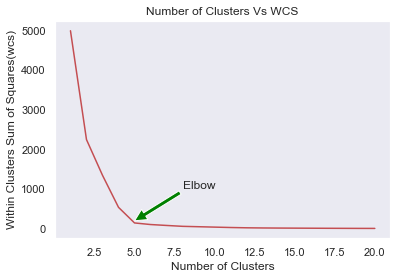

In [24]:
x = t_sleepData.iloc[:, :].values
wcs = []  #wcs stands for 'within cluster sum of squares'

for i in range(1, 21):
    model = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 250, n_init = 15, random_state = 0)
    model.fit(x)
    wcs.append(model.inertia_)

print(wcs)

plt.plot(range(1, 21), wcs, color = 'r')
plt.title('Number of Clusters Vs WCS')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Clusters Sum of Squares(wcs)')
plt.annotate('Elbow', xytext=(8, 1000), xy=(5,200), arrowprops={'facecolor':'green'})
plt.grid() 
plt.show()

### Elbow occurs where the line graph bends and wcs(within cluster sum of squares ) does not decrease significantly with every iteration. From the above graph, Elbow occurs at number of clusters equivalent to 5.
### So optimum number of clusters for this dataset = 5
### Since the optimum number of clusters is what we wanted, which is 5, we can see that clustering for all the "Body Temperature" may help to identify the pattern or to predict the "stress levels"

In [19]:
# Getting the data for "sl" and "t", and testing data
t_sleepData = pd.DataFrame(sleepData[["t", "sl"]])

#Initialize the class object
kmeans = KMeans(n_clusters= 5)
kmeans.fit(t_sleepData)
kmeans.cluster_centers_

array([[32.69059829,  3.11888112],
       [36.38888889,  0.        ],
       [33.88888889,  2.        ],
       [30.64444444,  4.        ],
       [35.        ,  1.        ]])

In [20]:
t_sleepData["Clusters"] = kmeans.labels_
t_sleepData.head()

,t,sl,Clusters
0,33.244444,3,0
1,33.084444,3,0
2,35.555556,1,4
3,32.648889,3,0
4,36.595556,0,1


<AxesSubplot:xlabel='t', ylabel='sl'>

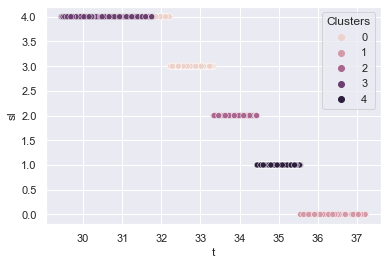

In [21]:
sns.scatterplot(x="t", y="sl", hue="Clusters", data=t_sleepData)

### From the graph above, we can see that for the cluster at the top, the points are not exactly what we wanted the cluster to be, thus it means that the clustering method for "body temperature" may not be as good to predict the "stress level"

# The whole dataset
### Getting the optimum number of clusters for the whole sleepData

[427534.86948148155, 98382.1697471332, 50155.04142866667, 28802.813775389728, 18149.67132072885, 13522.683939519524, 10339.524205422578, 7829.723867259259, 6191.687579259258, 4813.5519952592595, 4005.970859851852, 3296.1582411851855, 2701.438133333333, 2397.3625967407406, 2113.452917333333, 1859.283568592593, 1609.2909795555556, 1402.336877037037, 1275.577199012346, 1155.8681224691366]


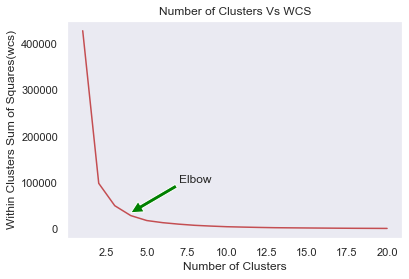

In [22]:
x = sleepData.iloc[:, :].values
wcs = []  #wcs stands for 'within cluster sum of squares'

for i in range(1, 21):
    model = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 250, n_init = 15, random_state = 0)
    model.fit(x)
    wcs.append(model.inertia_)

print(wcs)

plt.plot(range(1, 21), wcs, color = 'r')
plt.title('Number of Clusters Vs WCS')
plt.xlabel('Number of Clusters')
plt.ylabel('Within Clusters Sum of Squares(wcs)')
plt.annotate('Elbow', xytext=(7, 100000), xy=(4,35000), arrowprops={'facecolor':'green'})
plt.grid() 
plt.show()

### Elbow occurs where the line graph bends and wcs(within cluster sum of squares ) does not decrease significantly with every iteration. From the above graph, Elbow occurs at number of clusters equivalent to 4.
## So optimum number of clusters for this dataset = 4
### Since the optimum number of clusters is not what we wanted, which is 5, we can see that clustering for all the other variables may not help to identify the pattern or to predict the "stress levels"

<AxesSubplot:xlabel='t', ylabel='sl'>

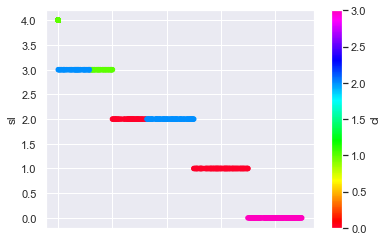

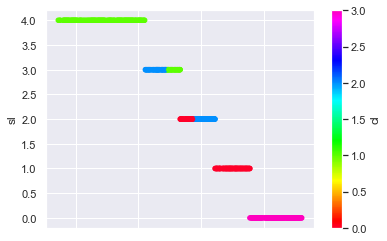

In [23]:
#Initialize the class object
kmeans = KMeans(n_clusters= 4)
kmeans.fit(train)

# Trying to visualise the scatterplot between stress level (sl) and sleep hours (sr.1)
train['cl'] = kmeans.labels_
train.plot.scatter('sr.1', 'sl', c='cl', colormap='gist_rainbow')

# Trying to visualise the scatterplot between stress level (sl) and body temperature (t)
train['cl'] = kmeans.labels_
train.plot.scatter('t', 'sl', c='cl', colormap='gist_rainbow')

### This is evident as shown from the graph above, if we clustered the data based on all the other data columns, the clustering may not be what we wanted and thus, clustering based on just "body temperature" and "sleep hours" would be better to predict the "stress levels"